
###### This breast cancer databases was obtained from the University of Wisconsin Hospitals
<br> this data has:
<pre>
 1. Sample code number             id number
 2. Clump Thickness                1 - 10
 3. Uniformity of Cell Size        1 - 10
 4. Uniformity of Cell Shape       1 - 10
 5. Marginal Adhesion              1 - 10
 6. Single Epithelial Cell Size    1 - 10
 7. Bare Nuclei                    1 - 10
 8. Bland Chromatin                1 - 10
 9. Normal Nucleoli                1 - 10
 10. Mitoses                       1 - 10
 11. Class:                        (2 for benign, 4 for malignant)
 </pre>

###### import packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###### reading the dataset
* the missing values are non standard in the "?" format

In [2]:
# replacing all the "?"s with NAN
data=pd.read_csv("breast-cancer-wisconsin.data",na_values=["?"],header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


###### time to explore

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       699 non-null    int64  
 1   1       699 non-null    int64  
 2   2       699 non-null    int64  
 3   3       699 non-null    int64  
 4   4       699 non-null    int64  
 5   5       699 non-null    int64  
 6   6       683 non-null    float64
 7   7       699 non-null    int64  
 8   8       699 non-null    int64  
 9   9       699 non-null    int64  
 10  10      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
# counting the missing values
data.isna().sum()

0      0
1      0
2      0
3      0
4      0
5      0
6     16
7      0
8      0
9      0
10     0
dtype: int64

In [5]:
# counting duplicates
data.duplicated().sum()

8

###### summary:
* the above data has 699 rows and 11 columns
* data has 11 columns all of them are integer except for the 6th column which is float
* data has 8 duplicates
* data has 16 missing values all of them are in the 6th column
* data has no empty rows

#### cleaning

In [6]:
# renaming columns for easier access
data.rename(columns={0:"id_number",1:"Clump Thickness",2:"Uniformity of Cell Size",3:"Uniformity of Cell Shape",
                     4:"Marginal Adhesion",5:"Single Epithelial Cell Size",6:"Bare Nuclei",7:"Bland Chromatin",
                     8:"Normal Nucleoli",9:"Mitoses",10:"Class"},inplace=True)
data.head()

,id_number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


###### "Bare Nuclei	" column

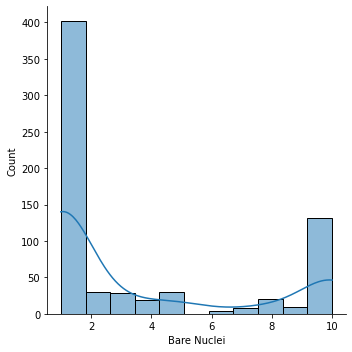

In [7]:
# the column is bimodally distributed
sns.displot(data['Bare Nuclei'],kde=True)

<AxesSubplot:xlabel='Bare Nuclei', ylabel='Count'>

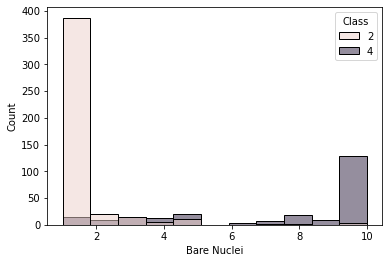

In [8]:
# the data here is grouped
sns.histplot(data=data, x="Bare Nuclei",hue="Class")

In [9]:
# finding out each category's median
data.groupby("Class").agg({"Bare Nuclei":"median"})

,Bare Nuclei
Class,
2,1.0
4,10.0


In [10]:
# replacing the missing values of each category with its median
data["Bare Nuclei"].fillna(data.groupby("Class")["Bare Nuclei"].transform("median"), inplace=True)

In [11]:
# changing the data type to integer
data["Bare Nuclei"]=data["Bare Nuclei"].astype("int")

In [12]:
# no more missing vales
data.isna().sum()

id_number                      0
Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

###### dropping all duplicates

In [13]:
data=data.drop_duplicates(ignore_index=True)

###### check

In [14]:
# the columns have the right data type with no missing vallues
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id_number                    690 non-null    int64
 1   Clump Thickness              690 non-null    int64
 2   Uniformity of Cell Size      690 non-null    int64
 3   Uniformity of Cell Shape     690 non-null    int64
 4   Marginal Adhesion            690 non-null    int64
 5   Single Epithelial Cell Size  690 non-null    int64
 6   Bare Nuclei                  690 non-null    int32
 7   Bland Chromatin              690 non-null    int64
 8   Normal Nucleoli              690 non-null    int64
 9   Mitoses                      690 non-null    int64
 10  Class                        690 non-null    int64
dtypes: int32(1), int64(10)
memory usage: 56.7 KB


In [15]:
# no duplicates
data.duplicated().any()

False

In [16]:
data.shape

(690, 11)

###### now the cleaning phase is done

###### summary:
* we filled the NANs with the appropriate match.
* we dropped the duplicated rows.
* the data now has 690 rows and 11 columns
* we lost about 9 columns while cleaning.

###### finding out the relation between each column and the "calss" column

<AxesSubplot:xlabel='Class', ylabel='Clump Thickness'>

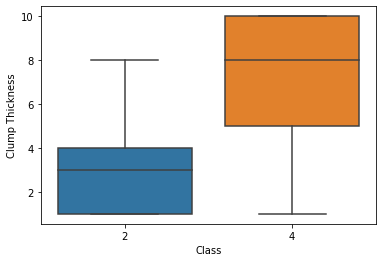

In [17]:
sns.boxplot(data=data,x="Class",y="Clump Thickness")

<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Size'>

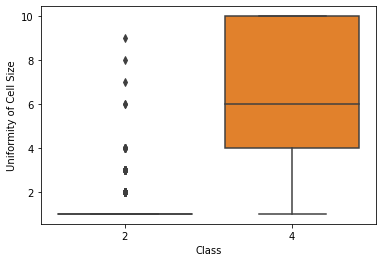

In [18]:
sns.boxplot(data=data,x="Class",y="Uniformity of Cell Size")

<AxesSubplot:xlabel='Class', ylabel='Uniformity of Cell Shape'>

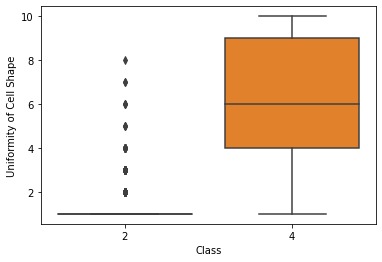

In [19]:
sns.boxplot(data=data,x="Class",y="Uniformity of Cell Shape")

<AxesSubplot:xlabel='Class', ylabel='Marginal Adhesion'>

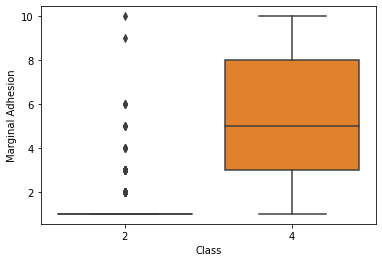

In [20]:
sns.boxplot(data=data,x="Class",y="Marginal Adhesion")

<AxesSubplot:xlabel='Class', ylabel='Single Epithelial Cell Size'>

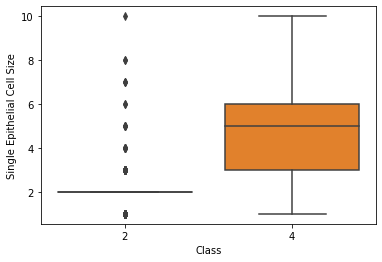

In [21]:
sns.boxplot(data=data,x="Class",y="Single Epithelial Cell Size")

<AxesSubplot:xlabel='Class', ylabel='Bare Nuclei'>

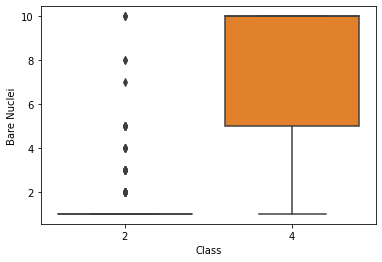

In [22]:
sns.boxplot(data=data,x="Class",y="Bare Nuclei")

<AxesSubplot:xlabel='Class', ylabel='Bland Chromatin'>

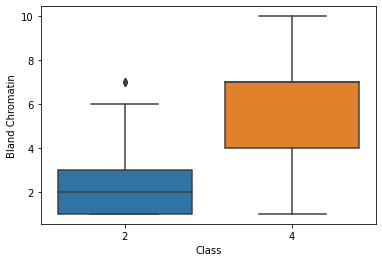

In [23]:
sns.boxplot(data=data,x="Class",y="Bland Chromatin")

<AxesSubplot:xlabel='Class', ylabel='Normal Nucleoli'>

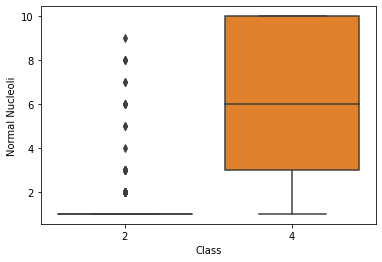

In [24]:
sns.boxplot(data=data,x="Class",y="Normal Nucleoli")

<AxesSubplot:xlabel='Class', ylabel='Mitoses'>

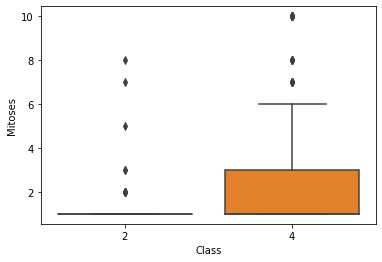

In [25]:
sns.boxplot(data=data,x="Class",y="Mitoses")

<AxesSubplot:xlabel='Mitoses', ylabel='count'>

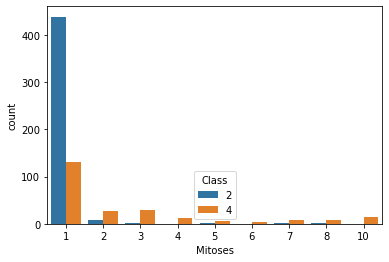

In [26]:
# a not predictive feature
sns.countplot(data=data,x="Mitoses",hue="Class")

###### A larger value of these parameters tends to show a correlation with malignant tumors.

###### now let's start the modelling phase

In [27]:
# dropping irrelevant columns
data=data.drop(["id_number","Mitoses"],axis=1)

###### splitting the data 

In [28]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(data.drop(["Class"],axis=1), data["Class"], test_size=0.3)
# 70% training and 30% test

###### Generating Model

In [29]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

###### model evaluation

In [30]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.961352657004831
